In [1]:
import noise_removal as nr
import utils as ut
import pandas as pd
import numpy as np
from numba import jit
import os
import random
import matplotlib.pyplot as plt
import pywt
from itertools import chain
import math
plt.style.use('seaborn-whitegrid')
from scipy.signal import butter, lfilter, filtfilt
def plot_rpeak_window(df_signal, anno_est, start, size, option1, option2):
    
    if option1 == 'random':
        start = random.randrange(len(df_signal))
    print(start)
    if option2 == 'filtered':
        df_signal = filtered_signal
    
    xs = range(start - size, start + size)
    ys = df_signal[xs] #- np.nanmedian(df_signal[xs])
    values = ['0', '1', '2', '3','4','5', '6', '7', '8', '9', '10'] 
    positions = range(start-3000, start+300, 300)
    
    markers = anno_est[(anno_est['pos'] > xs[0]) & (anno_est['pos'] < xs[len(xs)-1])]['pos']
    markers = np.asarray(markers) - start + size
    plt.rcParams["figure.figsize"] = (14,8)
    plt.figure(dpi=150)

    plt.plot(xs, ys, marker = 'o', color = 'blue', markevery = markers, markerfacecolor='lime', markersize = 8,
            linewidth = 1)
   
    plt.show()
    
def plot_rpeak_window(df_signal, anno_est, start, size, option1, option2):
    
    if option1 == 'random':
        start = random.randrange(len(df_signal))
    print(start)
    if option2 == 'filtered':
        df_signal = filtered_signal
    
    
    xs = range(start - size, start + size)
    ys = df_signal[xs] #- np.nanmedian(df_signal[xs])
    positions = range(start-3000, start+300, 300)
   
    markers = anno_est[(anno_est['pos'] > xs[0]) & (anno_est['pos'] < xs[len(xs)-1])]['pos']
    markers2 = markers.copy()
    ys2 = df_signal[markers2]
    targets = anno_est[(anno_est['pos'] > xs[0]) & (anno_est['pos'] < xs[len(xs)-1])]['target']
    markers = np.asarray(markers) - start + size
    
    plt.rcParams["figure.figsize"] = (14,8)
    plt.figure(dpi=150)

    colors = {'N':'lime', 'S':'purple', 'V':'red'}
    plt.plot(xs, ys, color = 'blue', linewidth = 1)
    plt.scatter(markers2, ys2, c=targets.map(colors), s = 80)
   
    plt.show()
    
def calc_lp(signal, low, high):
    n = len(signal)
    approxi = pywt.downcoef('a', signal, 'db4', level=low)
    baseline = pywt.upcoef('a', approxi, 'db4', level=low, take=n)
    
    approxi = pywt.downcoef('a', signal, 'db4', level=high)
    upper = pywt.upcoef('a', approxi, 'db4', level=high, take=n)
    return upper - baseline

In [2]:
X = nr.QRS_to_Noise('C600000389', sRate=250, num_threads=29, 
                path_raw='/home/cbn-gpu08/Docker/R/ECG/atsense/original',
                path_input='/home/cbn-gpu08/Docker/Python/ECG/dl_inputs',
                path_model='/home/cbn-gpu08/Docker/Python/ECG/models')

X.wfdb_to_npy()

X.save_dl_inputs('C600000389.npy')

X.noise_removal('light')

X.qrs_detection()

anno, sig, summary, anno_noise_removed, sig_noise_removed, clean, noise = X.create_output()

Processing wfdb file to numpy array
Saving deep learning inputs to directory
56
4904
4805799936
Augmentation Start!
4802420736
(array([0., 1.]), array([ 642, 2481]))
Fine-tuning Start!
4926173184
56
4904
Load_model!
4926173184
Epoch:   1. Loss: 0.1885. Acc.: 99.82%
Epoch 1 best model saved with accuracy: 99.82%
Epoch:   2. Loss: 0.1335. Acc.: 99.82%
Epoch:   4. Loss: 0.1084. Acc.: 99.82%
Epoch 5 best model saved with accuracy: 100.00%
Epoch:   8. Loss: 0.0648. Acc.: 100.00%
Early stopping on epoch 15
Done!
Prediction Start!
1196760128
1196760128
R_peadk detection Start
Start First Round!
Start Second Round!


/home/cbn-gpu08/Docker/Python/ECG/noise_removal/noise_removals.py:1159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.temp['rr_pre'][0] = self.sRate
/home/cbn-gpu08/Docker/Python/ECG/noise_removal/noise_removals.py:1161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.temp['rr_post'][len(self.temp)-1] = self.sRate


Creating Output


In [152]:
X = nr.QRS_to_Noise('C600000389', sRate=300, num_threads=29, 
                path_raw='/home/cbn-gpu08/Docker/R/ECG/atsense/original',
                path_input='/home/cbn-gpu08/Docker/Python/ECG/dl_inputs',
                path_model='/home/cbn-gpu08/Docker/Python/ECG/models')

X.wfdb_to_npy()

X.save_dl_inputs('C600000389.npy')

X.noise_removal('light')

X.qrs_detection()

anno, sig, summary, anno_noise_removed, sig_noise_removed, clean, noise = X.create_output()

Processing wfdb file to numpy array
Saving deep learning inputs to directory
56
4904
22473048064
Augmentation Start!
22473048064
(array([0., 1.]), array([ 311, 2232]))
Fine-tuning Start!
22468923392
56
4904
Load_model!
22468923392
Epoch:   1. Loss: 0.8350. Acc.: 73.80%
Epoch 1 best model saved with accuracy: 73.80%
Epoch:   2. Loss: 0.5371. Acc.: 75.33%
Epoch 2 best model saved with accuracy: 75.33%
Epoch 3 best model saved with accuracy: 75.98%
Epoch:   4. Loss: 0.4193. Acc.: 78.60%
Epoch 4 best model saved with accuracy: 78.60%
Epoch 5 best model saved with accuracy: 90.61%
Epoch 6 best model saved with accuracy: 90.83%
Epoch:   8. Loss: 0.2584. Acc.: 91.92%
Epoch 8 best model saved with accuracy: 91.92%
Epoch 9 best model saved with accuracy: 93.89%
Epoch 10 best model saved with accuracy: 94.10%
Epoch 11 best model saved with accuracy: 94.76%
Epoch 12 best model saved with accuracy: 96.51%
Epoch 13 best model saved with accuracy: 97.60%
Epoch:  16. Loss: 0.1582. Acc.: 97.82%
Epoch 

/home/cbn-gpu08/Docker/Python/ECG/noise_removal/noise_removals.py:1159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.temp['rr_pre'][0] = self.sRate
/home/cbn-gpu08/Docker/Python/ECG/noise_removal/noise_removals.py:1161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.temp['rr_post'][len(self.temp)-1] = self.sRate


Creating Output


In [153]:
an = anno_noise_removed.copy()
b, a = butter(2, [8/150, 20/150], btype='band')
filtered_ecg = filtfilt(b, a, sig_noise_removed)
filtered_ecg = filtered_ecg *filtered_ecg 
b, a = butter(1, [5/150, 15/150], btype='band')
filtered_ecg2 = filtfilt(b, a, sig_noise_removed)
diff = np.diff(filtered_ecg2) 
diff = np.append(diff[0], diff)
squared = diff*diff
center = 170000
summary

,noise_ratio(%),num_QRS,mean,p_50,max,sd,num_wide_rr,num_narrow_rr
0,88.52,92953,184.77,185.0,3715,63.62,130,0


In [154]:
center =0
r = 1500

9902933


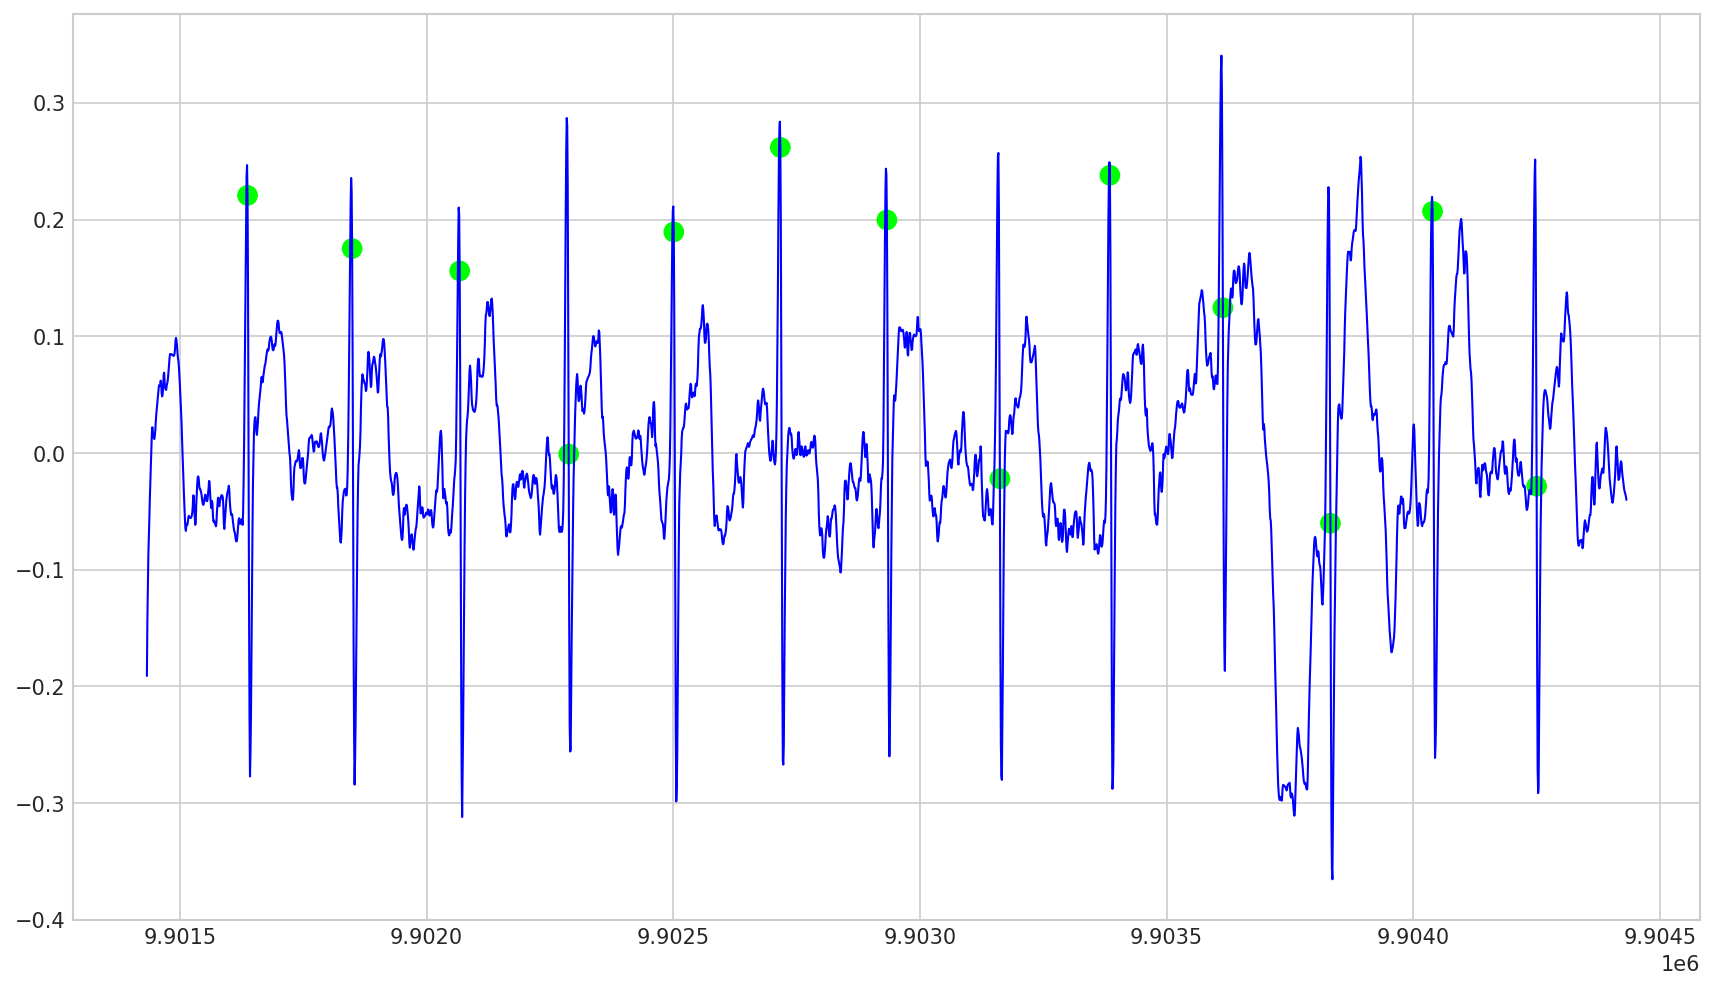

In [186]:
center = random.choice(np.array(an.pos))
plot_rpeak_window(sig_noise_removed, an, center, r, 'a', 'a')
center = center + 5000

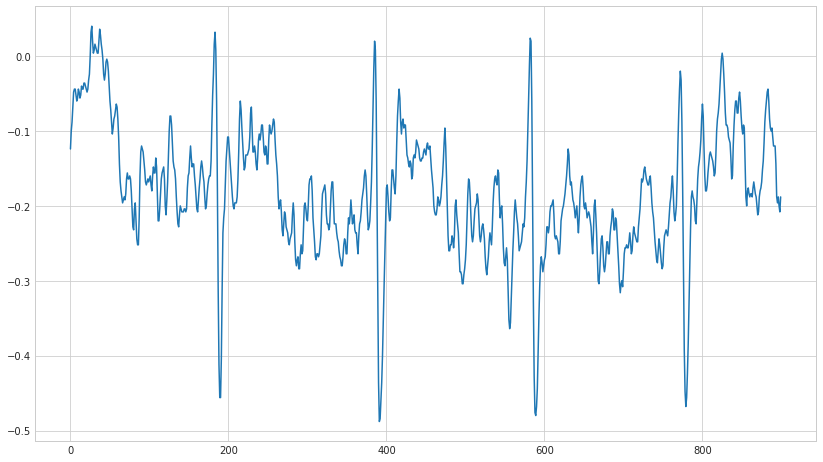

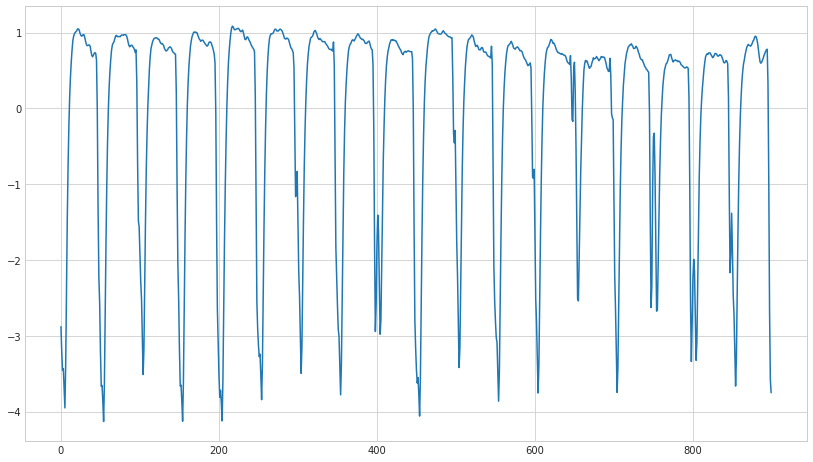

In [199]:
plt.rcParams["figure.figsize"] = (14,8)
plt.figure() 
x = random.choice(range(len(clean)))
plt.plot(clean[x, :])

plt.figure()
x = random.choice(range(len(noise)))
plt.plot(noise[x, :])


In [49]:
summary

,noise_ratio(%),num_QRS,mean,p_50,max,sd,num_wide_rr,num_narrow_rr
0,1.45,1096924,261.34,256.0,2624,71.89,6592,0


In [ ]:
an = anno_noise_removed.copy()
print(an.apc_run.value_counts())
print(an.afib.value_counts())

In [ ]:
rr_pre >> sorted() >> np.array()

In [ ]:
@jit(nopython = True)
def apcrun_detector(rpeaks, threshold, option = 'relative', window_size = 30, num_cut = 2):
    
    rr_pre = rpeaks - np.roll(rpeaks, 1)
    rr_pre[np.where(rr_pre > 1000)] = np.median(rr_pre)
    rr_pre[np.where(rr_pre < 0)] = np.median(rr_pre)
    rr_post = np.roll(rpeaks, -1) - rpeaks 
    rr_post[len(rpeaks)-1] = np.median(rr_pre)
    rr_ratio = rr_pre / rr_post

    ave = np.mean(rr_pre)
    
    if option == 'relative':
        cutoff = np.quantile(rr_ratio[np.where(rr_ratio < 0.90)], 0.5)
    else:
        cutoff = threshold
    afib_idx = []
    equal_dist_flag = [1 if (w > 0.95) & (w < 1.05) else 0 for w in rr_ratio]
    
    for i in range(len(rpeaks)):
       
        if i < 5:
            num = 0
            x = []
            k = i
            num_iter = 0
            while num < 5:
                num_iter = num_iter + 1
                if equal_dist_flag[k] == 1:
                    x.append(rr_pre[k])
                    num = num + 1
            
                k = k+1
            x = np.array(x)
            rr_intv_window = np.mean(x)
        else:
            num = 0
            x = []
            k = i
            num_iter = 0
            while num < 5:
                num_iter = num_iter + 1
                if equal_dist_flag[k] == 1:
                    x.append(rr_pre[k])
                    num = num + 1
                k = k-1
            x = np.array(x)
            rr_intv_window = np.mean(x)
         
        if ((rr_ratio[i] < cutoff) | (rr_intv_window*cutoff > rr_pre[i])) & ((rr_post[i] > rr_intv_window*2.025) | (rr_post[i] < rr_intv_window*1.975)):
            prmt_flag = 1
        else:
            prmt_flag = 0

        if (rr_pre[i] > rr_intv_window*0.95) & (num_iter <= 15) & (rr_intv_window <= ave*cutoff) & (rr_pre[i] < rr_intv_window*1.05) & (prmt_flag == 1):
            afib_idx.append(1)
        else:
            afib_idx.append(0)
            
    x = len(afib_idx) % window_size
    afib1 = afib_idx[0:len(afib_idx)-x]
    afib2 = afib_idx[len(afib_idx)-x:len(afib_idx)]
    
    dim1 = int(len(afib1)/window_size)
    afib1 = np.array(afib1)
    afib1 = afib1.reshape(dim1, window_size)

    afib_flag1 = afib1.sum(axis = 1)
    afib2 = np.array(afib2)
    afib_flag = np.append(afib_flag1, np.sum(afib2))
    afib_flag = afib_flag1

    afib_flag = [1 if w >= num_cut else 0 for w in afib_flag]
    afib_flag = np.array(afib_flag)
    afib_label = []
    for i in range(len(afib_flag)):
        x = rr_ratio[window_size*i: window_size*(i+1)]
        y = np.zeros(window_size)
        if afib_flag[i] == 1:
            y = np.ones(window_size)
            y[np.where(x > 1.4)] = 0
        afib_label.append(y)
        
#     x = rr_ratio[-len(afib2):]
#     y = np.zeros(len(x))
#     if afib_flag[-1] == 1:
#         y = np.ones(len(x))
#         y[np.where(x > 1.4)] = 0
#     afib_label.append(y)
    
    afib_label = np.array([item for sublist in afib_label for item in sublist])
#     afib_label = np.delete(afib_label, [0,1,2,3])
    
    return afib_label

def search_previous(idx, x):
    if idx == -1:
        idx = 1
    if idx > 200:
        y = np.array(x[idx-200:idx])
        z = np.where(y == 0)[0]
        if len(z) > 0:
            z = z[-1] + idx - 200
        else:
            z = idx
    else:
        y = np.array(x[0:idx])
        z = np.where(y == 0)[0]
        if len(z) > 0:
            z = z[-1]
        else:
            z = idx
    return z

def search_post(idx, x):
    if idx < len(x)-301:
        y = x[idx:idx+300]
    else:
        y = x[idx:len(x)]
    z = np.where(y == 0)[0]
    if len(z) > 0:
        z = z[0] + idx
    else:
        z = idx
    return z
    

def apcrun_filter(rpeaks):
    rr_pre = rpeaks - np.roll(rpeaks, 1)
    rr_pre[np.where(rr_pre > 1000)] = np.median(rr_pre)
    rr_pre[np.where(rr_pre < 0)] = np.median(rr_pre)
    rr_post = np.roll(rpeaks, -1) - rpeaks 
    rr_post[len(rpeaks)-1] = np.median(rr_pre)
    rr_ratio = rr_pre / rr_post
    rr_pre[np.where(rr_pre < 0)] = np.median(rr_pre)
    
    ave = np.mean(rr_pre)
    
    sorted_pre = np.array(sorted(rr_pre))
    avg2 = np.mean(sorted_pre[int(len(rr_pre)*0.05):int(len(rr_pre)*0.95)])
    avg2 = avg2 **2
    
    missing_idx = np.where((rr_ratio > 0.4875) & (rr_ratio < 0.5125))[0]
    rr_pre_temp = rr_pre.copy()
    rr_pre_temp[missing_idx+1] = rr_pre_temp[missing_idx+1]/2 
    
    cr = []
    for i in missing_idx:
        cr.append(math.log(np.std(rr_pre_temp[i-10:i+10]/avg2*10000+1)))

    cr = np.array(cr)
    recover = missing_idx[np.where(cr < 0.5)[0]]
    rr_pre[recover+1] = rr_pre[recover+1]/2
    rr_post[recover] = rr_post[recover]/2
    rr_ratio[recover] = 1
    
    equal_dist_flag = np.array([1 if (w > 0.88) & (w < 1.12) else 0 for w in rr_ratio])
    
    
    rr_pre_conv = []
    rr_post_conv = []
    
    for i in range(3, len(rpeaks)):
        pre = np.mean(rr_pre[i-3:i])
        rr_pre_conv.append(pre)
        
    for i in range(len(rpeaks)-3):   
        post = np.mean(rr_pre[i+1:i+4])
        rr_post_conv.append(post)
        
    rr_pre_conv = [rr_pre[1], rr_pre[1], rr_pre[1]] + rr_pre_conv
    rr_post_conv = rr_post_conv + [rr_pre[len(rpeaks)-1], rr_pre[len(rpeaks)-1], rr_pre[len(rpeaks)-1]]
        
    irr_conv = []
    for i in range(len(rr_pre_conv)):
        if rr_pre_conv[i] < 0.815*rr_post_conv[i]:
            irr_conv.append(1)
        else:
            irr_conv.append(0)
            
    irr_conv = np.array(irr_conv)
        
    apc_idxes = []
    irr_idxes = np.where((rr_ratio < 0.815) & (irr_conv == 1))[0]
    irr_starts = np.array([search_previous(w, equal_dist_flag) for w in irr_idxes])
    pre_starts = np.array([search_previous(w, equal_dist_flag) for w in irr_starts])
    post_ends = np.array([search_post(w, equal_dist_flag) for w in irr_idxes+1])
    
    ave_all = []
    for i in range(len(rr_pre)):
        if i < 120:
            ave = np.mean(rr_pre[i:240])
        elif i > len(rpeaks)-120:
            ave = np.mean(rr_pre[i-240:i])
        else:
            ave = np.mean(rr_pre[i-120:i+120])
        ave_all.append(ave)
    ave_all = np.array(ave_all)
    ave_all = ave_all[irr_idxes]
    
    
    ave_pre = np.array([np.mean(rr_pre[x:y]) for x, y in zip(pre_starts, irr_starts)])
    ave_irr = np.array([np.nanmean(rr_pre[x+1:y+1]) for x, y in zip(irr_starts, irr_idxes)])
    ave_post = np.array([np.mean(rr_pre[x:y]) for x, y in zip(irr_idxes+1, post_ends)])
    
    c = np.nanmax(np.array([ave_pre, ave_post]), axis = 0)
    
    
    ave_all =  np.nanmax(np.array([ave_all, c]), axis = 0)
    x = np.where((ave_irr < ave_all*0.815))[0]
    
    apc_run = []
    for i in x:
        potential = list(range(irr_starts[i], irr_idxes[i]))
        apc_run.append(potential)
        
    apc_run = np.array(list(chain.from_iterable(apc_run)))
    return apc_run


In [ ]:
@jit(nopython = True)
def apcrun_filter_part1(rpeaks):
    rr_pre = rpeaks - np.roll(rpeaks, 1)
    rr_pre[np.where(rr_pre > 1000)] = np.median(rr_pre)
    rr_pre[np.where(rr_pre < 0)] = np.median(rr_pre)
    rr_post = np.roll(rpeaks, -1) - rpeaks 
    rr_post[len(rpeaks)-1] = np.median(rr_pre)
    rr_ratio = rr_pre / rr_post
    rr_pre[np.where(rr_pre < 0)] = np.median(rr_pre)
    
    ave = np.mean(rr_pre)
    
    sorted_pre = np.array(sorted(rr_pre))
    avg2 = np.mean(sorted_pre[int(len(rr_pre)*0.05):int(len(rr_pre)*0.95)])
    avg2 = avg2 **2
   
    missing_idx = np.where((rr_ratio > 0.4875) & (rr_ratio < 0.5125))[0]
    rr_pre_temp = rr_pre.copy()
    rr_pre_temp[missing_idx+1] = rr_pre_temp[missing_idx+1]/2 
    
    cr = []
    
    for i in missing_idx:
        if i >= 10:
            cr.append(math.log(np.std(rr_pre_temp[i-10:i+10]/avg2*10000+1)))
        else:
            cr.append(math.log(np.std(rr_pre_temp[i:i+20]/avg2*10000+1)))
    
    cr = np.array(cr)
    recover = missing_idx[np.where(cr < 0.5)[0]]
    rr_pre[recover+1] = rr_pre[recover+1]/2
    rr_post[recover] = rr_post[recover]/2
    rr_ratio[recover] = 1
    
    equal_dist_flag = np.array([1 if (w > 0.88) & (w < 1.12) else 0 for w in rr_ratio])
    
  
    rr_pre_conv = []
    rr_post_conv = []
    
    for i in range(3, len(rpeaks)):
        pre = np.mean(rr_pre[i-3:i])
        rr_pre_conv.append(pre)
        
    for i in range(len(rpeaks)-3):   
        post = np.mean(rr_pre[i+1:i+4])
        rr_post_conv.append(post)
        
    rr_pre_conv = [rr_pre[1], rr_pre[1], rr_pre[1]] + rr_pre_conv
    rr_post_conv = rr_post_conv + [rr_pre[len(rpeaks)-1], rr_pre[len(rpeaks)-1], rr_pre[len(rpeaks)-1]]
        
    irr_conv = []
    for i in range(len(rr_pre_conv)):
        if rr_pre_conv[i] < 0.815*rr_post_conv[i]:
            irr_conv.append(1)
        else:
            irr_conv.append(0)
            
    irr_conv = np.array(irr_conv)
        
    apc_idxes = []
    irr_idxes = np.where((rr_ratio < 0.815) & (irr_conv == 1))[0]
    
    irr_starts = []
    pre_starts = []
    post_ends = []
    
    x = equal_dist_flag.copy()
    for idx in irr_idxes:
        if idx == -1:
            idx = 1
        if idx > 200:
            y = x[idx-200:idx]
            z = np.where(y == 0)[0]
            if len(z) > 0:
                z = z[-1] + idx - 200
            else:
                z = idx
        else:
            y = x[0:idx]
            z = np.where(y == 0)[0]
            if len(z) > 0:
                z = z[-1]
            else:
                z = idx
        irr_starts.append(z)
    
    for idx in irr_starts:
        if idx == -1:
            idx = 1
        if idx > 200:
            y = x[idx-200:idx]
            z = np.where(y == 0)[0]
            if len(z) > 0:
                z = z[-1] + idx - 200
            else:
                z = idx
        else:
            y = x[0:idx]
            z = np.where(y == 0)[0]
            if len(z) > 0:
                z = z[-1]
            else:
                z = idx
        pre_starts.append(z)
        
    for idx in irr_idxes+1:
        if idx < len(x)-301:
            y = x[idx:idx+300]
        else:
            y = x[idx:len(x)]
        z = np.where(y == 0)[0]
        if len(z) > 0:
            z = z[0] + idx
        else:
            z = idx
            
        post_ends.append(z)
    
    ave_all = []
    for i in range(len(rr_pre)):
        if i < 120:
            ave = np.mean(rr_pre[i:240])
        elif i > len(rpeaks)-120:
            ave = np.mean(rr_pre[i-240:i])
        else:
            ave = np.mean(rr_pre[i-120:i+120])
        ave_all.append(ave)
    ave_all = np.array(ave_all)
    ave_all = ave_all[irr_idxes]
    
    return rr_pre, pre_starts, irr_starts, irr_idxes, post_ends, ave_all

def apcrun_filter_part2(rr_pre, pre_starts, irr_starts, irr_idxes, post_ends, ave_all):
    ave_pre = np.array([np.mean(rr_pre[x:y]) for x, y in zip(pre_starts, irr_starts)])
    ave_irr = np.array([np.nanmean(rr_pre[x+1:y+1]) for x, y in zip(irr_starts, irr_idxes)])
    ave_post = np.array([np.mean(rr_pre[x:y]) for x, y in zip(irr_idxes+1, post_ends)])

    c = np.nanmax(np.array([ave_pre, ave_post]), axis = 0)


    ave_all =  np.nanmax(np.array([ave_all, c]), axis = 0)
    x = np.where((ave_irr < ave_all*0.815))[0]

    apc_run = []
    for i in x:
        potential = list(range(irr_starts[i], irr_idxes[i]))
        apc_run.append(potential)

    apc_run = np.array(list(chain.from_iterable(apc_run)))
    return apc_run

In [ ]:
rr_pre, pre_starts, irr_starts, irr_idxes, post_ends, ave_all = apcrun_filter_part1(rpeaks)
y = apcrun_filter_part2(rr_pre, pre_starts, irr_starts, irr_idxes, post_ends, ave_all)

In [ ]:
len(y)

In [ ]:
len(apcrun_filter(rpeaks))

In [ ]:
an = anno_noise_removed.copy()
rpeaks = np.array(an['pos'])

In [ ]:
x = apcrun_filter(rpeaks)

In [ ]:
print(np.unique(an.apc_run8, return_counts = True))
an.target[an.apc_run8 == 1] = 'S'

In [ ]:
x = np.array(an['pos'][(an.apc_run == 1) & (an.apc_run5 == 0) & (an.afib == 0)])
x = np.array(an['pos'][(an.apc_run8 == 1) & (an.afib == 0)])
x = np.array(an['pos'][(an.apc_run8 == 1)])
print(len(x))
center = random.choice(x)
plot_rpeak_window(sig_noise_removed, an, center, 3000, 'a', 'a')

In [ ]:
@jit(nopython = True)
def center_mean(sig, anno):
    x = []
    for center in anno:
        x.append(np.mean(sig[center-5:center+5]))
    return x

In [ ]:
@jit(nopython = True)
def cut_signal(ecg1, centers, size):
    ecg_big_array = [ecg1[x-size:x+size] for x in centers]
    return ecg_big_array

@jit(nopython = True)        
def running_mean(x, N):
    
    cumsum = np.cumsum(x) 
    cumsum[N:] = (cumsum[N:] - cumsum[:-N]) / float(N)
    
    for i in range(1, N):
        cumsum[i-1] = cumsum[i-1] / i

    return cumsum


In [ ]:
def correct_peak(filtered_signal, qrs_array, sRate, size):
    peaks = np.array(qrs_array)
    peaks = peaks[np.where(peaks > size)]
    
    ecg_big_array = cut_signal(filtered_signal, peaks, size)
    max_per_window = [np.argmax(w) for w in ecg_big_array]
    max_per_window = np.asarray(max_per_window)
    addings = peaks[:]
    addings = [w-size for w in addings]
    addings = np.asarray(addings)
    max_per_window = np.add(max_per_window, addings)

    return max_per_window

def correct_peak_min(filtered_signal, qrs_array, sRate, size):
    peaks = np.array(qrs_array)
    peaks = peaks[np.where(peaks > size)]
    
    ecg_big_array = cut_signal(filtered_signal, peaks, size)
    max_per_window = [np.argmin(w) for w in ecg_big_array]
    max_per_window = np.asarray(max_per_window)
    addings = peaks[:]
    addings = [w-size for w in addings]
    addings = np.asarray(addings)
    max_per_window = np.add(max_per_window, addings)

    return max_per_window

def remove_amplitude(filtered_signal, rpeak, sRate):

    rpeak_new = correct_peak(filtered_signal, rpeak, 70)
    amp_array1 = filtered_signal[rpeak_new]
    
    rpeak_new = correct_peak_min(filtered_signal, rpeak_new, 15)
    amp_array2 = filtered_signal[rpeak_new]
    
    amp_array = np.abs(amp_array1 - amp_array2)
    
    remove = np.where(amp_array < 0.1)[0]
#     remove_idx = np.where(amp_array < 0.5*mva)[0]
    
#     diff_signal = np.abs(np.diff(filtered_signal))
#     diff_array = diff_signal[rpeak]
#     diff_mean = np.array(center_mean(diff_signal, rpeak))
#     remove_diff = np.where(diff_array < 0.5*diff_mean)[0]
#     remove = list(remove_idx) + list(remove_diff)
#     remove.sort()
#     remove = list(dict.fromkeys(remove))

    return np.array(remove)

def get_summary_anno(x):
    x = np.asarray(x)
    X = pd.DataFrame({
                      'num_QRS' : len(x),
                      'mean': np.nanmean(x),
                      'p_50': np.nanquantile(x, 0.50),
                      'max': np.nanmax(x),
                      'sd': np.nanstd(x), 
                      'num_wide_rr': len(np.where(x > 500)[0]),
                      'num_narrow_rr': len(np.where(x < 60)[0])}, index = [0])
    return(X.round(2))



In [ ]:
rpeak = np.array(an['pos'])

In [ ]:
filtered = calc_lp(sig_noise_removed, 7, 3)

In [ ]:
squared = filtered*filtered

In [ ]:
rpeak_new = correct_peak(squared, rpeak, 30, 100)

In [ ]:
wrong_peaks = remove_amplitude(filtered, rpeak, sRate=300)

In [ ]:
an2 = an.drop(wrong_peaks,axis=0)
an2['rr_pre'] = an2['pos'] - np.roll(an2['pos'], 1)
an2['rr_pre'][0] = 300
an2['rr_post'] = np.roll(an2['pos'], -1) - an2['pos'] 
an2['rr_post'][len(an2)-1] = 300
an2['rr_ratio'] = an2['rr_pre'] / an2['rr_post']
get_summary_anno(np.array(an2['rr_pre']))

In [ ]:
x = np.array(range(0,2000))
plt.scatter(x, squared[rpeak_new][0:2000])
plt.ylim(0, 0.1)

In [ ]:
get_summary_anno(np.array(an['rr_pre']))

In [ ]:
for id_no in [10,11,12,13,14]:

    for task in [1, 2]:

        patient_id = file_names_anno[id_no][:-15]
        full_signal = at_signals_raw[id_no]
        anno = at_annos[id_no].drop([0,1,2,3, len(at_annos[id_no])-1])
        anno['pred'] = pred_lists[id_no].astype(np.int)
        anno['target'][anno.target == 'N'] = 0
        anno['target'][anno.target == 'S'] = 1
        anno['target'][anno.target == 'V'] = 2
        anno['flag'] = np.zeros(len(anno))
        anno['flag'][(anno.target==0)&(anno.pred==task)] = 1
        anno['flag']= anno['flag'].astype(int)

        start = anno['loc'][anno.flag == 0].iloc[0] + 3600
        rpeaks = np.array(anno['loc'])
        x =  np.arange(rpeaks[0], rpeaks[len(rpeaks)-1], 18000)
        anno['group'] = np.digitize(rpeaks, x)

        anno = anno.groupby('group').filter(lambda s: s.flag.sum() > 0) 
        rpeaks = np.array(anno['loc'])
        starts = np.array(anno.groupby('group').first()['loc'])
        ends = np.array(anno.groupby('group').tail(1))

        anno.target = anno.target.astype(int)
        targets = np.array(anno.target)
        flags = np.array(anno.flag)
        bpms = np.round(np.array(300/np.array(anno.rr_pre)*60)).astype(int)

        @jit(nopython = True)  
        def get_sigs_peaks(full_signal, starts, targets, flags, bpms):

            sigs = []
            peaks = []
            tar = []
            flg = []
            bpm = []
            for i in starts:
                for j in range(5):
                    sigs.append(full_signal[i+j*3600:i+(j+1)*3600])
                    peaks.append(rpeaks[np.where((rpeaks >= i+j*3600) & 
                                                (rpeaks < i+(j+1)*3600))]- i-(j*3600))
                    tar.append(targets[np.where((rpeaks >= i+j*3600) & 
                                                (rpeaks < i+(j+1)*3600))])
                    flg.append(flags[np.where((rpeaks >= i+j*3600) & 
                                                (rpeaks < i+(j+1)*3600))])
                    bpm.append(bpms[np.where((rpeaks >= i+j*3600) & 
                                                (rpeaks < i+(j+1)*3600))])

            return sigs, peaks, tar, flg, bpm

        x, r, tar, flg, bpm = get_sigs_peaks(full_signal, starts, targets, flags, bpms)

        new_r = []
        for i in np.arange(0, len(r)-4, 5):
            new_r.append([r[i], r[i+1], r[i+2], r[i+3], r[i+4]])

        new_x = []
        for i in np.arange(0, len(x)-4, 5):
            new_x.append([x[i], x[i+1], x[i+2], x[i+3], x[i+4]])

        new_tar = []
        for i in np.arange(0, len(r)-4, 5):
            new_tar.append([tar[i], tar[i+1], tar[i+2], tar[i+3], tar[i+4]])

        new_flg = []
        for i in np.arange(0, len(r)-4, 5):
            new_flg.append([flg[i], flg[i+1], flg[i+2], flg[i+3], flg[i+4]])

        new_bpm = []
        for i in np.arange(0, len(r)-4, 5):
            new_bpm.append([bpm[i], bpm[i+1], bpm[i+2], bpm[i+3], bpm[i+4]])

        time = np.round(starts/300, 3)


        path = '/home/cbn-gpu08/Docker/R/ECG/atsense/plot_cnu2/' + patient_id
        if task == 1:
            os.chdir(path + '/SVE')
        else:
            os.chdir(path + '/PVC')

        plotname = file_names_anno[id_no][:-15]

        colors = {'N': 'lime', 'S': 'purple', 'V':'orange', 'C': 'red'}
        try:
            for j, t in zip(range(len(new_r)), time):
                fig = plt.figure(figsize = (16, 14))
                gs = fig.add_gridspec(5, hspace=0)
                axs = gs.subplots(sharex=True, sharey=True)
                fig.suptitle('\n' + '\n' + plotname + '_' + '00' + str(j) + 'th_' +  str(t) + ' seconds')   

                for i in range(5):

                    sig = new_x[j][i]
                    markers = new_r[j][i]
                    df = pd.DataFrame({'x': new_r[j][i], 'y': -1.0, 
                                       'group':new_tar[j][i], 'flag':new_flg[j][i],
                                      'bpm': new_bpm[j][i]})
                    df['group'][df.group == 0] = 'N'
                    df['group'][df.group == 1] = 'S'
                    df['group'][df.group == 2] = 'V'
                    df['group'][df.flag == 1] = 'C'
                    groups = df.groupby('group')
                    axs[i].plot(range(3600), new_x[j][i], color = 'black', linewidth = 1.5)

                    for x, z in zip(new_r[j][i], new_bpm[j][i]):
                        axs[i].text(x-2, 1, str(z), color="black", fontsize=12)

                    axs[i].set_ylim([-2, 2])
                    for name, group in groups:
                        if name == 'C':
                            axs[i].plot(group.x, 
                                    group.y, 
                                    marker='o', 
                                    linestyle='',
                                    color = colors[name],
                                       mew = 5.25)
                        else:
                            axs[i].plot(group.x, 
                                    group.y, 
                                    marker='o', 
                                    linestyle='',
                                    color = colors[name],
                                       mew = 0.75)

                    plt.xticks(np.arange(0, 3900, 300), range(13))


                    for k in range(0, 60) :
                        axs[i].axvline(12*300/60*k,c='red',linewidth=0.5, alpha=0.4)

                    for k in range(0, 300) :
                        axs[i].axvline(12*300/300*k,c='red',linewidth=0.5, alpha=0.15)

                    for k in range(0, 4) :
                        axs[i].axhline(0.5*k,c='red',linewidth=0.5, alpha=0.4)
                        axs[i].axhline(-0.5*k,c='red',linewidth=0.5, alpha=0.4)

                    for k in range(0, 20) :
                        axs[i].axhline(0.1*k,c='red',linewidth=0.5, alpha=0.15)
                        axs[i].axhline(-0.1*k,c='red',linewidth=0.5, alpha=0.15)

                    axs[i].axvline(12*300, c='red',linewidth=0.5, alpha=0.4)

                fig.savefig(plotname + '_' + '00' + str(j) + 'th_' +  str(t) + ' seconds' + '.png', dpi = 300)
                plt.close(fig) 
        except:
            pass

In [ ]:
from IPython.display import clear_output

from ecgdetectors import Detectors
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import glob
import math

from multiprocessing import Pool
import parmap
from datetime import datetime
import wfdb

import re
from numba import jit
import gc
from itertools import chain
import random
from scipy import fftpack
import pywt
import scipy

from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from multiprocessing import cpu_count
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

import torch
from torch import nn
from torch import optim
from torch.nn import functional as F
from torch.optim.lr_scheduler import _LRScheduler
from torch.utils.data import TensorDataset, DataLoader
from scipy.fft import fft, ifft
from scipy.fft import fftfreq
import sklearn
from utils.util_functions import *
from scipy.signal import butter, lfilter, filtfilt

try:
    import pathlib
except ImportError:
    import pathlib2 as pathlib
    
import scipy.signal as signal
import warnings
warnings.simplefilter(action='ignore', category = FutureWarning)

import gc
import sys
import os, psutil


# R-peak detection
@jit(nopython = True)        
def running_mean(x, N):
    
    cumsum = np.cumsum(x) 
    cumsum[N:] = (cumsum[N:] - cumsum[:-N]) / float(N)
    
    for i in range(1, N):
        cumsum[i-1] = cumsum[i-1] / i

    return cumsum

@jit(nopython = True)
def pan_tompkins_peak(ma_sig, sRate, option):    

    dist_cutoff = int(0.25*sRate)

    real_peaks = [0]
    noise_peaks = []

    RR_missed = 0
    index = 0
    indexes = []

    missed_peaks = []
    potential_peaks = []
    
    SPKI = 0.0
    NPKI = 0.0

    threshold_I1 = 0.0
    threshold_I2 = 0.0
    
    RR_low_limit = 0

    for i in range(len(ma_sig)):

        if (i > 0) & (i < len(ma_sig)-1):
            # i should be larger than its previous and post amplitude for becoming a peak
            if (ma_sig[i-1] < ma_sig[i]) & (ma_sig[i+1] < ma_sig[i]):
                peak = i
                potential_peaks.append(peak)
                
                # The second condition requires two neighboring peaks must be far apart 250ms each other
                if (ma_sig[peak] > threshold_I1) & (peak-real_peaks[-1] > dist_cutoff):
                        
                    real_peaks.append(peak)
                    indexes.append(index)
                    
                     # When the current potential peak did not satisfy the first condition for becoming a peak,
                    # the second condition checks if the one is a peak or not again
                    if RR_missed != 0:
                        # This condition check if there would be a missed interval by calculating RR distance
                        # between two neighboring peaks
                        if real_peaks[-1] - real_peaks[-2] > RR_missed:
                            peaks_in_missed = np.array(potential_peaks[indexes[-2]+1:indexes[-1]])
                            
                            pre = real_peaks[-2]
                            current = real_peaks[-1]
                            condition = (peaks_in_missed-pre > dist_cutoff) & (current-peaks_in_missed > dist_cutoff) & (ma_sig[peaks_in_missed] > threshold_I2)
                            peaks_in_missed2 = peaks_in_missed[np.where(condition)]
                            
                            if len(peaks_in_missed2) > 0:           
                                missed_peak = peaks_in_missed2[np.argmax(ma_sig[peaks_in_missed2])]
                                missed_peaks.append(missed_peak)
                                real_peaks.append(real_peaks[-1])
                                real_peaks[-2] = missed_peak   
                    
                    # This part prevents the outlier peaks from distorting heavily the thresholds
                    # If the current peak is over 10 times the threshold, threshold is not updated
                    if (ma_sig[real_peaks[-1]] > 10*SPKI):
                        SPKI = SPKI
                    else:
                        SPKI = 0.125*ma_sig[real_peaks[-1]] + 0.875*SPKI
                        
                else:
                    noise_peaks.append(peak)
                    # This part prevents the outlier peaks from distorting heavily the thresholds
                    # If the current peak is less than 0.1 times the threshold, threshold is not updated
                    if (ma_sig[noise_peaks[-1]] < 0.10*NPKI):
                        NPKI = NPKI
                    else:
                        NPKI = 0.125*ma_sig[noise_peaks[-1]] + 0.875*NPKI

                threshold_I1 = NPKI + 0.25*(SPKI-NPKI)
                threshold_I2 = 0.5*threshold_I1
                   
                if option == 'origianl':
                    if len(real_peaks) > 18:

                        if RR_low_limit == 0:
                            RR_default = np.mean(np.diff(np.array(real_peaks[:9])))
                            RR_low_limit = 0.92 * RR_default
                            RR_high_limit = 1.16 * RR_default

                        # Exclude the outlier RR beats for the reference RR to find the missed sections
                        RR_interval = np.diff(np.array(real_peaks[-18:]))
                        acceptable_beats = np.where((RR_interval > RR_low_limit) & (RR_interval < RR_high_limit))[0]

                        if len(acceptable_beats) > 8:
                            RR_ave = int(np.mean(RR_interval[acceptable_beats][-9:]))
                        elif (len(acceptable_beats) > 4) & (len(acceptable_beats) <= 8):
                            RR_ave = int(np.mean(RR_interval[acceptable_beats]))
                        else:
                            RR_ave = int(np.mean(RR_interval[-9:]))

                        RR_missed = int(1.66*RR_ave)
                        RR_low_limit = 0.92 * RR_ave
                        RR_high_limit = 1.16 * RR_ave
                else:
                    if len(real_peaks) > 8:
                        RR_interval = np.diff(np.array(real_peaks[-9:]))
                        RR_ave = int(np.mean(RR_interval))
                        RR_missed = int(1.66*RR_ave)
                
                index = index+1      
    
    real_peaks.pop(0)

    return real_peaks    

def pan_tompkins_detector(filtered_ecg, option, sRate, low_pass, high_pass):
        
#         filtered_ecg = calc_lp(filtered_ecg, 4, 3)
        b, a = butter(1, [5/150, 15/150], btype='band')
        filtered_ecg = filtfilt(b, a, filtered_ecg)
        
        diff = np.diff(filtered_ecg) 
        diff = np.append(diff[0], diff)
        squared = diff*diff
        
        N = int(0.12*sRate)
        units = running_mean(squared, N)
        units[:int(0.2*sRate)] = 0

        peaks_array = pan_tompkins_peak(units, sRate, option)

        return peaks_array
    
@jit(nopython = True)
def elgendi_peak(filtered_ecg, start, end, sRate):
    qrs_array = []
    for i in range(len(start)):
        if end[i] - start[i] > int(0.08*sRate):
            potential_peak = np.argmax(filtered_ecg[start[i]:end[i]+1])+start[i]
            if qrs_array:
                if potential_peak - qrs_array[-1] > int(0.3*sRate):
                    qrs_array.append(potential_peak)
            else:
                qrs_array.append(potential_peak)
    return qrs_array

def elgendi_detector(filtered_ecg, sRate, low_pass, high_pass):
    
    b, a = butter(2, [8/150, 20/150], btype='band')
    filtered_ecg = filtfilt(b, a, filtered_ecg)
#     squared = filtered_ecg * filtered_ecg
    diff = np.diff(filtered_ecg) 
    diff = np.append(diff[0], diff)
    squared = diff*diff
    
    diff = np.diff(squared) 
    diff = np.append(diff[0], diff)
    squared = diff*diff
    
#     squared = filtered_ecg * filtered_ecg
       
    short_range = int(0.12*sRate)
    mwa_short2 = running_mean(abs(squared), short_range)
    mwa_short = running_mean(abs(filtered_ecg), short_range)

    long_range = int(0.6*sRate)
    mwa_long2 = running_mean(abs(squared), long_range)
    mwa_long = running_mean(abs(filtered_ecg), long_range)

    blocks = np.zeros(len(filtered_ecg))
    block_max = np.nanmax(filtered_ecg)

    blocks[np.where((mwa_short > mwa_long) & (mwa_short2 > mwa_long2))] = block_max
    lead_first = blocks[0]
    lead_last = blocks[-1]
    blocks_lead = np.roll(blocks, 1)
    blocks_lead[0] = lead_first
    blocks_lead[-1] = lead_last
    block_max_col = np.full(blocks.shape, block_max)

    block_matrix = np.c_[blocks_lead, blocks]
    start = list(np.where(block_matrix[:,0] < block_matrix[:,1]))
    start = start[0]
    start = start[:-2]
    end = list(np.where(block_matrix[:,0] > block_matrix[:,1]))
    end = end[0]-1

    QRS = elgendi_peak(filtered_ecg, start, end, sRate)

    return QRS



def fix_wide_rr(pan, elgendi, cutoff_rr):
    pan = np.array(pan)
    elgendi = np.array(elgendi)
    
    if len(pan > 0):
        pan_lag = np.roll(pan, 1)
        pan_lag[0] = 0
        rr_pre = pan - pan_lag # This is RR interval
        location_post = np.array(np.where(rr_pre > cutoff_rr)[0])
        location_pre = location_post - 1

        A = [np.where((pan[location_pre[i]] < elgendi) & (pan[location_post[i]] > elgendi))[0] 
             for i in range(len(location_post))] 
        
        # "supplements" are the location of R-peaks that Pan missed & Elgendi found
        supplements = np.array([item for l in  A for item in l])
        if len(supplements) > 0:
            rpeaks = np.concatenate((pan, elgendi[supplements]))
            rpeaks = list(set(rpeaks))
            rpeaks.sort()
        else:
            rpeaks = pan
    else:
        rpeaks = elgendi

    return rpeaks  

def pan_elgendi(band_signal, sRate, cutoff_wide, option):
    
    # Apply Pan and Elgendi algorithms to the band_passed signal
    pan = pan_tompkins_detector(band_signal, option, sRate = sRate, low_pass=4, high_pass=3)
    elgendi = elgendi_detector(band_signal, sRate = sRate, low_pass=4, high_pass=3)
    
    # If Pan missed the R-peaks, we supplement these with the R-peaks which were found by Elgendi
    # "Cutoff_wide" is the criteria to decide missing R-peaks 
    if len(pan) > 0 or len(elgendi) > 0:
        rpeak = fix_wide_rr(pan, elgendi, cutoff_wide) 
    else:
        rpeak = []
#     rpeak = pan
    return np.array(rpeak)

# This process is the second round to find R-peaks
# If there are long intervals with missed R-peaks, we find the R-peaks within those intervals
def qrs_first_round(raw_signal, sRate, cutoff_wide, num_threads, option):
    print('Start First Round!')
    # Split the raw signal into the number of threads for parallel computing
    # Each splitted signal should be greater than 100000 samples to find R-peaks
    x = int(len(raw_signal)/100000)
    cutoff = np.linspace(1, len(raw_signal), num_threads, dtype = int)
    cutoff = np.delete(cutoff, [0, len(cutoff)-1])
   
    splitted_signal = np.split(raw_signal, cutoff)
   
    x = []
    for i in range(len(splitted_signal)):
        x.append(pan_elgendi(splitted_signal[i], sRate, cutoff_wide, option))

    # The starting location of each splitted signal should be added
    y = [x[w] + cutoff[w-1] for w in range(len(x)) if w > 0]
    y = np.concatenate(y, axis = 0)
    rpeaks = np.concatenate((x[0], y), axis = 0)

#     rpeaks = pan_elgendi(raw_signal, sRate, cutoff_wide)

    return rpeaks

def qrs_second_round(raw_signal, rpeaks, sRate, cutoff_wide, option):
    print('Start Second Round!')
    all_peaks = rpeaks.tolist()
    sub_signals = []
    
    for i in range(0, 5):
        all_peaks.sort()
        anno_est = np.array(all_peaks, dtype = np.int32)
        x = anno_est - np.roll(anno_est, 1) 
        x[0] = 300
        wide_end = anno_est[np.where(x > sRate*3)]
        wide_start = anno_est[np.where(x > sRate*3)[0] - 1]
        
        rpeak_big_array = []
        for j in range(len(wide_start)):
            signal_sub = np.array(raw_signal[wide_start[j]:wide_end[j]])
            sub_signals.append(signal_sub)
            rpeak = pan_elgendi(signal_sub, sRate, cutoff_wide, option)

            if len(rpeak) > 0:
                rpeak = rpeak + wide_start[j]
                rpeak_big_array.append(rpeak)

        missing = list(chain(*rpeak_big_array))
        
        if len(missing) > 0:
            all_peaks = all_peaks + missing
    all_peaks.sort()

    return all_peaks
# This moves the approximate R-peaks to the correct location
def correct_peak(filtered_signal, qrs_array, sRate, size):
    peaks = np.array(qrs_array)
    peaks = peaks[np.where(peaks > size)]
    
    ecg_big_array = cut_signal(filtered_signal, peaks, size)
    max_per_window = [np.argmax(np.abs(w)) for w in ecg_big_array]
    max_per_window = np.asarray(max_per_window)
    addings = peaks[:]
    addings = [w-size for w in addings]
    addings = np.asarray(addings)
    max_per_window = np.add(max_per_window, addings)

    return max_per_window

def correct_peak_min(filtered_signal, qrs_array, sRate, size):
    peaks = np.array(qrs_array)
    peaks = peaks[np.where(peaks > size)]
    
    flag = np.sign(filtered_signal[peaks])
    
    ecg_big_array = cut_signal(filtered_signal, peaks, size)
    max_per_window = [np.argmin(w) if v == 1 else np.argmax(w) for w, v in zip(ecg_big_array, flag)]
    max_per_window = np.asarray(max_per_window)
    addings = peaks[:]
    addings = [w-size for w in addings]
    addings = np.asarray(addings)
    max_per_window = np.add(max_per_window, addings)

    return max_per_window

def remove_amplitude(filtered_signal, rpeak, sRate):

    rpeak = np.array(correct_peak(filtered_signal, rpeak, sRate, 20))
    amp_array1 = np.array(filtered_signal[rpeak])
    rpeak_low = np.array(correct_peak_min(filtered_signal, rpeak, sRate, 20))
    amp_array2 = filtered_signal[rpeak_low]
    
    amp_array = np.abs(amp_array1 - amp_array2)
   
    remove = np.where(amp_array < 0.06)[0]

    return np.array(remove)

# This removes false R-peaks by its amplitude of slope
def remove_too_small(filtered_signal, rpeaks_array, cutoff_peak, sRate):

    filtered_signal  = np.absolute(filtered_signal) 
    too_small = np.where(filtered_signal[rpeaks_array] < cutoff_peak)[0]
    rpeak_corrected = np.delete(rpeaks_array, too_small)
    
    return rpeak_corrected

def correct_too_narrow(ecg1, rpeaks_array, sRate):

    rpeak_lag = np.roll(rpeaks_array, 1)
    
    rpeak_lag[0] = 0
    rr_pre = rpeaks_array - rpeak_lag
    location_after = np.array(np.where(rr_pre < sRate*0.20)[0])
    location_before = location_after - 1
    rpeak_before = rpeaks_array[location_before]
    rpeak_after = rpeaks_array[location_after]
    ecg1 = np.diff(ecg1)
    ecg1 = np.absolute(ecg1)

    if len(rpeak_before) > 0:
        
        ecg_narrow_big_array1 = np.asarray([np.nanmean(ecg1[x-2:x+2]) for x in rpeak_before])
        ecg_narrow_big_array2 = np.asarray([np.nanmean(ecg1[x-2:x+2]) for x in rpeak_after])
        
        remove2 =  rpeak_after[ecg_narrow_big_array1 - ecg_narrow_big_array2 > 0]
        remove1 =  rpeak_before[ecg_narrow_big_array1 - ecg_narrow_big_array2 < 0]

        rpeak_remove = np.concatenate((remove1, remove2))
        rpeak_corrected = np.setdiff1d(rpeaks_array,rpeak_remove)
    else:
        rpeak_corrected = rpeaks_array
    
    return rpeak_corrected

# Main function
def rpeak_final(raw_signal, filtered_signal, sRate, cutoff_wide, 
                cutoff_height, search_window2, num_threads, option):
     
    diff = np.diff(filtered_signal)
    squared = diff*diff
    diff = np.diff(squared)
    squared2 = diff*diff
    
    rpeaks = qrs_first_round(raw_signal, sRate, cutoff_wide, num_threads, option)
    rpeaks = qrs_second_round(raw_signal, rpeaks, sRate,  cutoff_wide, option)

    rpeaks = correct_peak(squared2, rpeaks, sRate, search_window2)
    remove = remove_amplitude(filtered_signal, rpeaks, sRate)
    
    rpeaks = np.delete(rpeaks, remove)
    
    rpeaks = remove_too_small(squared, rpeaks, cutoff_height, sRate)
#     rnew = rpeaks.copy()
    rnew = correct_too_narrow(filtered_signal, rpeaks, sRate)
    rnew = correct_too_narrow(filtered_signal, rnew, sRate)
    rnew = correct_too_narrow(filtered_signal, rnew, sRate)


    return rnew

def calc_lp(signal, low, high):
    n = len(signal)
    approxi = pywt.downcoef('a', signal, 'db4', level=low)
    baseline = pywt.upcoef('a', approxi, 'db4', level=low, take=n)
    
    approxi = pywt.downcoef('a', signal, 'db4', level=high)
    upper = pywt.upcoef('a', approxi, 'db4', level=high, take=n)
    return upper - baseline
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]




In [ ]:
filtered_signal = calc_lp(sig, 8, 1)

In [ ]:
x = rpeak_final(sig, filtered_signal, 250, 250, 
                0.000025, 70, 29, 'a')

In [ ]:
an_all = pd.DataFrame({'pos': x, 'target': 'N'})
an_all['rr_pre'] = an_all['pos'] - np.roll(an_all['pos'], 1)
an_all['rr_pre'][0] = 300
an_all['rr_post'] = np.roll(an_all['pos'], -1) - an_all['pos'] 
an_all['rr_post'][len(an_all)-1] = 300
an_all['rr_ratio'] = an_all['rr_pre'] / an_all['rr_post']

In [ ]:
len(x)

In [ ]:
from scipy.signal import butter, lfilter, filtfilt
import re
from numba import jit
import gc
from itertools import chain
import random
from scipy import fftpack
import scipy

In [ ]:
sig_noise_removed_over = scipy.signal.resample(sig, len(sig)*2)

In [ ]:
filtered_signal = calc_lp(sig_noise_removed_over, 8, 1)

In [ ]:
x = rpeak_final(sig_noise_removed_over, filtered_signal, 300, 450, 
                0.000000000000000025, 70, 29, 'a')

In [ ]:
an_all = pd.DataFrame({'pos': x, 'target': 'N'})
an_all['rr_pre'] = an_all['pos'] - np.roll(an_all['pos'], 1)
an_all['rr_pre'][0] = 300
an_all['rr_post'] = np.roll(an_all['pos'], -1) - an_all['pos'] 
an_all['rr_post'][len(an_all)-1] = 300
an_all['rr_ratio'] = an_all['rr_pre'] / an_all['rr_post']

In [ ]:
center = random.choice(np.array(an_all.pos))
plot_rpeak_window(sig_noise_removed_over, an_all, center, 2000, 'a', 'a')
center = center + 5000